In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
from math import sqrt
# from keras.models import Sequential
# from keras.layers.core import Dense, Dropout, Activation
# from keras.layers.recurrent import LSTM
# from keras.models import load_model
import keras
import h5py

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM
from keras.models import load_model

In [83]:
path_data_sse = r"Dataset\SSE 2012 2022.xlsx"

#read dataset
data_sse = pd.read_excel(path_data_sse)

In [84]:
data_sse = data_sse.set_index('Date')
data_sse.index = pd.to_datetime(data_sse.index)
data_sse

,Open,High,Low,Close,Adj Close,Volume,lag1,lag2,lag3,lag4,...,Mov Avg (3),MAD (3),Mov Avg (4),MAD (4),Mov Avg (5),MAD (5),Mov Avg (10),MAD (10),Mov Avg (20),MAD (20)
Date,,,,,,,,,,,,,,,,,,,,,
2012-12-31,2236.46,2269.51,2236.46,2269.13,2269.13,128000.0,2269.13,2269.13,2269.13,2269.13,...,2269.130000,0.000000,2269.1300,0.000000,2269.13,0.00,2269.13,0.00,2269.13,0.00
2013-01-04,2289.51,2296.11,2256.56,2276.99,2276.99,139400.0,2269.13,2276.99,2276.99,2276.99,...,2276.990000,0.000000,2276.9900,0.000000,2276.99,0.00,2276.99,0.00,2276.99,0.00
2013-01-07,2271.66,2293.32,2266.86,2285.36,2285.36,118200.0,2276.99,2269.13,2285.36,2285.36,...,2285.360000,0.000000,2285.3600,0.000000,2285.36,0.00,2285.36,0.00,2285.36,0.00
2013-01-08,2284.65,2289.14,2262.98,2276.07,2276.07,123000.0,2285.36,2276.99,2269.13,2276.07,...,2277.160000,-0.000479,2276.0700,0.000000,2276.07,0.00,2276.07,0.00,2276.07,0.00
2013-01-09,2271.30,2283.90,2259.05,2275.34,2275.34,122000.0,2276.07,2285.36,2276.99,2269.13,...,2279.473333,-0.001813,2276.8875,-0.000680,2275.34,0.00,2275.34,0.00,2275.34,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,3048.20,3071.84,3047.35,3065.56,3065.56,206500.0,3045.87,3054.43,3068.41,3073.77,...,3056.236667,0.003051,3060.6200,0.001614,3069.92,0.00,3121.80,-0.02,3147.38,-0.03
2022-12-27,3077.75,3098.08,3074.31,3095.57,3095.57,222200.0,3065.56,3045.87,3054.43,3068.41,...,3055.286667,0.013185,3058.5675,0.012098,3061.61,0.01,3110.45,0.00,3146.73,-0.02
2022-12-28,3088.62,3098.65,3079.43,3087.40,3087.40,224600.0,3095.57,3065.56,3045.87,3054.43,...,3069.000000,0.005995,3065.3575,0.007191,3065.97,0.01,3102.38,0.00,3144.02,-0.02


In [85]:
data_sse.shape

(2429, 23)

In [86]:
data_sse= data_sse.dropna()
data_sse.isna().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
lag1            0
lag2            0
lag3            0
lag4            0
lag5            0
Mov Avg (2)     0
MAD (2)         0
Mov Avg (3)     0
MAD (3)         0
Mov Avg (4)     0
MAD (4)         0
Mov Avg (5)     0
MAD (5)         0
Mov Avg (10)    0
MAD (10)        0
Mov Avg (20)    0
MAD (20)        0
dtype: int64

In [87]:
data_sse.shape

(2423, 23)

In [88]:
#Add IF factor into dataframe
iso = IsolationForest(n_estimators=1000)
iso.fit_predict(data_sse[['Close', 'MAD (5)']])
data_sse['IF MAD (5)'] = iso.decision_function(data_sse[['Close', 'MAD (5)']])
iso.fit_predict(data_sse[['Close', 'MAD (10)']])
data_sse['IF MAD (10)'] = iso.decision_function(data_sse[['Close', 'MAD (10)']])
iso.fit_predict(data_sse[['Close', 'MAD (20)']])
data_sse['IF MAD (20)'] = iso.decision_function(data_sse[['Close', 'MAD (20)']])
iso.fit_predict(data_sse[['Close', 'MAD (2)']])
data_sse['IF MAD (2)'] = iso.decision_function(data_sse[['Close', 'MAD (2)']])
iso.fit_predict(data_sse[['Close', 'MAD (3)']])
data_sse['IF MAD (3)'] = iso.decision_function(data_sse[['Close', 'MAD (3)']])
iso.fit_predict(data_sse[['Close', 'MAD (4)']])
data_sse['IF MAD (4)'] = iso.decision_function(data_sse[['Close', 'MAD (4)']])

C:\Users\ROSYID\AppData\Local\Temp\ipykernel_8088\1457314992.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sse['IF MAD (5)'] = iso.decision_function(data_sse[['Close', 'MAD (5)']])
C:\Users\ROSYID\AppData\Local\Temp\ipykernel_8088\1457314992.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sse['IF MAD (10)'] = iso.decision_function(data_sse[['Close', 'MAD (10)']])
C:\Users\ROSYID\AppData\Local\Temp\ipykernel_8088\1457314992.py:8: SettingWithCopyWarning: 
A value is trying to be set on a c

In [89]:
# data_sp['IF MAD (5)']= data_sp['IF MAD (5)'].where(data_sp['IF MAD (5)']==1, 0)

In [195]:
#split dataset
# train = data_sp.loc[data_sp.index < '2020-12-31']
# test = data_sp.loc[data_sp.index >= '2020-12-31']

FEATURE = [['lag1','lag2', 'lag3', 'lag4', 'lag5'],
           ['lag1','lag2', 'MAD (2)', 'IF MAD (2)'],
           ['lag1','lag2', 'lag3', 'MAD (2)', 'IF MAD (2)', 'MAD (3)', 'IF MAD (3)'],
           ['lag1','lag2', 'lag3', 'lag4', 'MAD (2)', 'IF MAD (2)', 'MAD (3)', 'IF MAD (3)', 'MAD (4)', 'IF MAD (4)'],
           ['lag1','lag2', 'lag3', 'lag4', 'lag5', 'MAD (5)', 'IF MAD (5)'],
           ['lag1','lag2', 'lag3', 'lag4', 'lag5', 'MAD (10)', 'IF MAD (10)'],
           ['lag1','lag2', 'lag3', 'lag4', 'lag5', 'MAD (20)', 'IF MAD (20)']]

TARGET = ['Close']

# test.shape

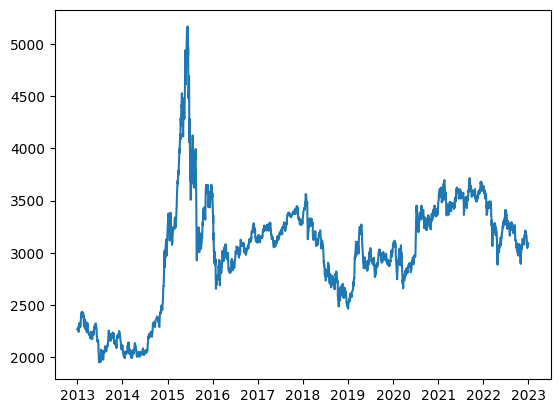

In [164]:
plt.plot(data_sse['Close'])
plt.show()

1938 485
Epoch 1/20


c:\Users\ROSYID\OneDrive - UGM 365\MAD-IF-XGBoost\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1938/1938 - 5s - 3ms/step - loss: 0.0036 - val_loss: 2.7228e-04
Epoch 2/20
1938/1938 - 3s - 2ms/step - loss: 7.3017e-05 - val_loss: 1.4835e-05
Epoch 3/20
1938/1938 - 4s - 2ms/step - loss: 3.8052e-05 - val_loss: 1.2678e-05
Epoch 4/20
1938/1938 - 3s - 2ms/step - loss: 2.8734e-05 - val_loss: 5.6455e-05
Epoch 5/20
1938/1938 - 4s - 2ms/step - loss: 3.6402e-05 - val_loss: 1.2462e-06
Epoch 6/20
1938/1938 - 3s - 2ms/step - loss: 2.1594e-05 - val_loss: 1.3714e-06
Epoch 7/20
1938/1938 - 4s - 2ms/step - loss: 2.4440e-05 - val_loss: 6.8612e-07
Epoch 8/20
1938/1938 - 3s - 2ms/step - loss: 1.8278e-05 - val_loss: 8.7331e-05
Epoch 9/20
1938/1938 - 3s - 2ms/step - loss: 2.1655e-05 - val_loss: 5.5612e-06
Epoch 10/20
1938/1938 - 3s - 2ms/step - loss: 2.2476e-05 - val_loss: 1.7962e-06
Epoch 11/20
1938/1938 - 4s - 2ms/step - loss: 2.2014e-05 - val_loss: 2.4887e-06
Epoch 12/20
1938/1938 - 4s - 2ms/step - loss: 1.7688e-05 - val_loss: 1.9075e-06
Epoch 13/20
1938/1938 - 4s - 2ms/step - loss: 1.8886e-05 - val_l

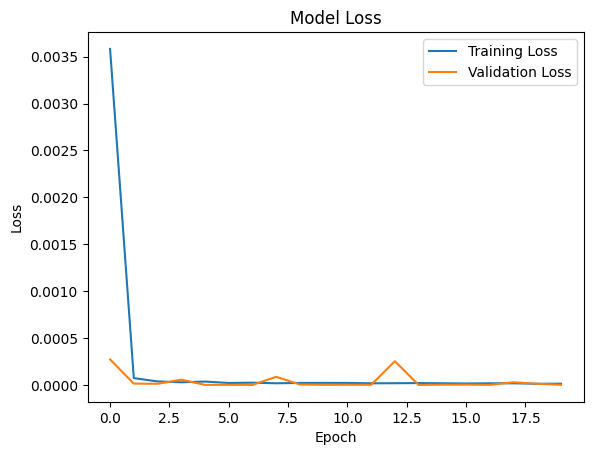

In [196]:
# Normalization
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = min_max_scaler.fit_transform(data_sse[FEATURE[3]+TARGET].values)

# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

x_train, y_train = train[:,:-1], train[:,-1:]
x_test, y_test = test[:,:-1], test[:,-1:]

# Reshape the input data for LSTM 
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

# Create the LSTM network
n_feature = dataset.shape[1]-1
model = Sequential()
model.add(LSTM(20, input_shape=(1, n_feature)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model
history= model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2, validation_data=(x_test, y_test))

#Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Forecast
trainPredict = np.hstack((train[:,:-1],model.predict(x_train)))
testPredict = np.hstack((test[:,:-1],model.predict(x_test)))

# Calculate the model performance
# decode predictions from normalization
trainPredict = min_max_scaler.inverse_transform(trainPredict)
train = min_max_scaler.inverse_transform(train)
testPredict = min_max_scaler.inverse_transform(testPredict)
test = min_max_scaler.inverse_transform(test)

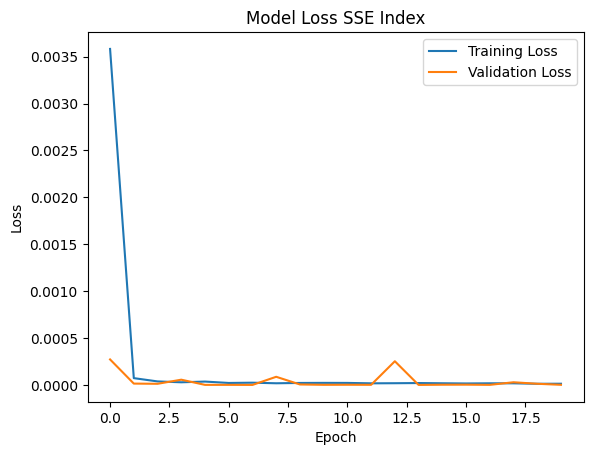

In [197]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss SSE Index')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [198]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def eval(y, predict):
    
    # Mean absolute error (MAE)
    mae = mean_absolute_error(y, predict)
    # Mean squared error (MSE)
    mse = mean_squared_error(y, predict)
    # # Root Mean Square Error (RMSE)
    rmse = sqrt(mse)
    #r_square
    r2 = r2_score(y, predict)
    #mape
    mape= mean_absolute_percentage_error(y, predict)

    return [r2, mape, rmse, mae]

In [199]:
# Performance score
r2, mape, rmse, mae = eval(train[:,-1:], trainPredict[:,-1:])
print(f'Train Score => R2: {r2*100: .2f}%, MAPE: {mape*100: .2f}%, RMSE: {rmse: .2f}, MAE: {mae: .2f}')
r2, mape, rmse, mae = eval(test[:,-1:], testPredict[:,-1:])
print(f'Test Score => R2: {r2*100: .2f}%, MAPE: {mape*100: .2f}%, RMSE: {rmse: .2f}, MAE: {mae: .2f}')

Train Score => R2:  99.99%, MAPE:  0.17%, RMSE:  6.03, MAE:  4.93
Test Score => R2:  99.95%, MAPE:  0.11%, RMSE:  4.44, MAE:  3.78


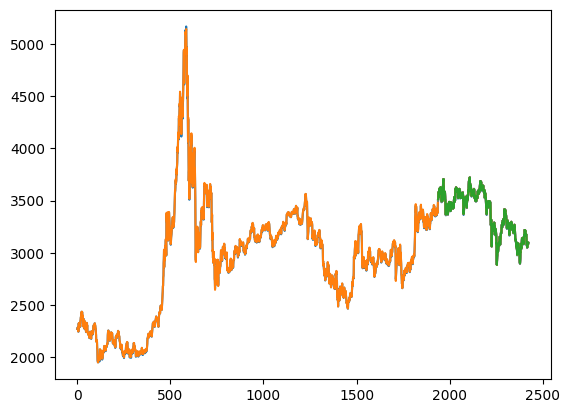

In [200]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset[:,-1:])
trainPredictPlot[:, :] = np.nan
trainPredictPlot[:len(trainPredict[:,-1:]), :] = trainPredict[:,-1:]
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict[:,-1:]):len(dataset), :] = testPredict[:,-1:]
# plot baseline and predictions
dataset_decode= min_max_scaler.inverse_transform(dataset)
plt.plot(dataset_decode[:,-1:])
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

''

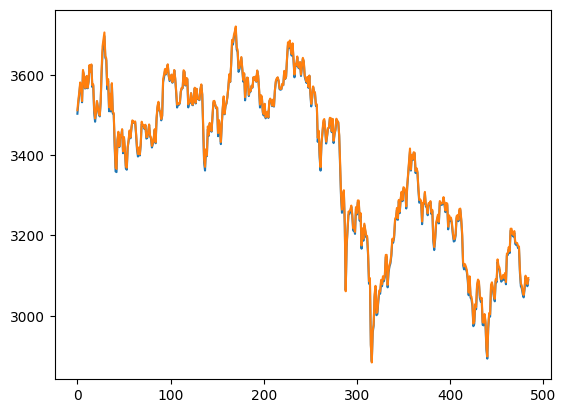

In [201]:
f, (ax1) = plt.subplots(1,1)
ax1.plot(list(test[:,-1:]))
ax1.plot(testPredict[:,-1:])
ax1.get_label()

In [202]:
train[:,-1:]

array([[2269.13],
       [2276.99],
       [2285.36],
       ...,
       [3379.04],
       [3414.45],
       [3473.07]])

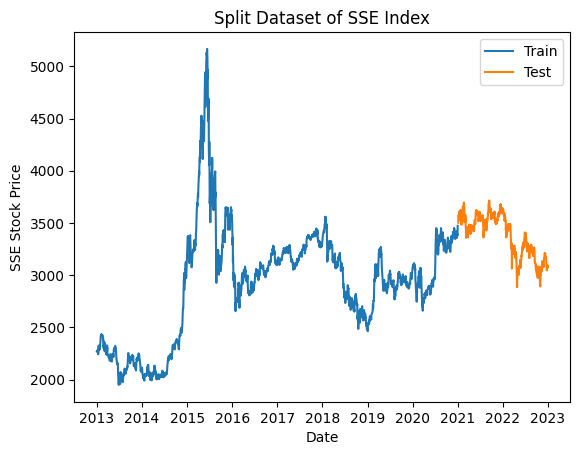

In [203]:
testPlot = np.empty_like(dataset)
testPlot[:, :] = np.nan
testPlot[len(train[:,-1:]):len(dataset), :] = test[:,-1:]
plt.plot(data_sse[:len(train[:,-1:])].index, train[:,-1:], label= 'Train')
plt.plot(data_sse.index, testPlot[:,-1:], label= 'Test')
plt.title('Split Dataset of SSE Index')
plt.xlabel('Date')
plt.ylabel('SSE Stock Price')
plt.legend()
plt.show()

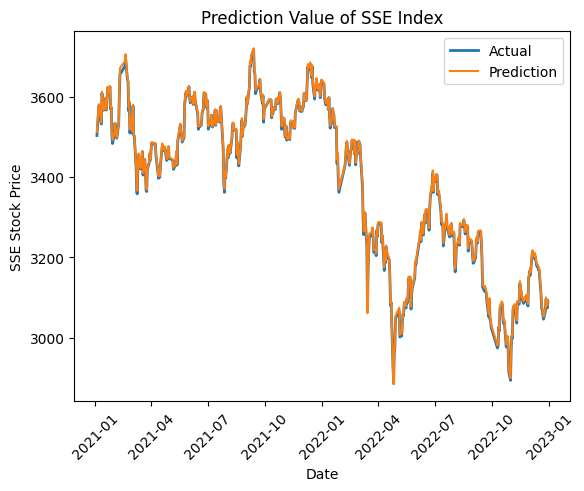

In [204]:
plt.plot(data_sse[-len(test[:,-1:]):].index, test[:,-1:], label= 'Actual', linewidth= 2)
plt.plot(data_sse[-len(test[:,-1:]):].index, testPredict[:,-1:], label= 'Prediction', linewidth= 1.5)
plt.title('Prediction Value of SSE Index')
plt.xlabel('Date')
plt.ylabel('SSE Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

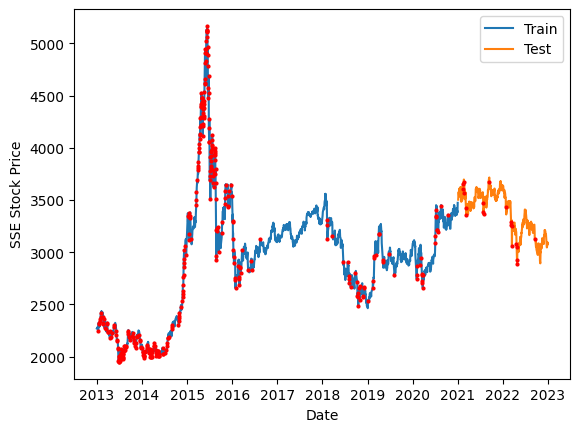

In [205]:
plt.plot(data_sse[:len(train[:,-1:])].index, train[:,-1:], label= 'Train')
plt.plot(data_sse.index, testPlot[:,-1:], label= 'Test')
plt.plot(data_sse.index, data_sse['Close'].where(data_sse['IF MAD (3)']<0), marker= 'o', markersize= 2, color= 'r', linewidth=0)
plt.xlabel('Date')
plt.ylabel('SSE Stock Price')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Isolation Forest Value of SSE Index')

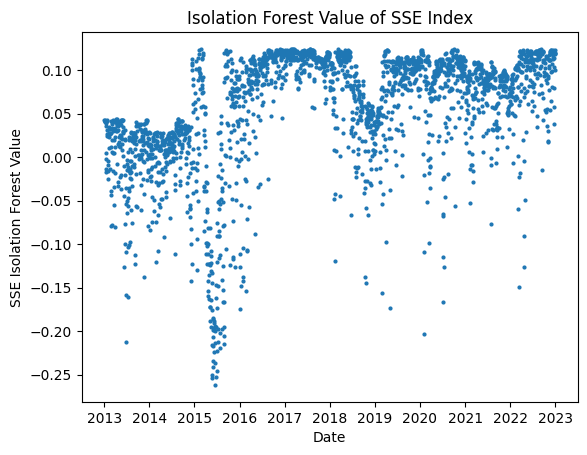

In [206]:
plt.plot(data_sse.index, data_sse['IF MAD (3)'], marker= 'o', markersize= 2, linewidth=0)
plt.xlabel('Date')
plt.ylabel('SSE Isolation Forest Value')
plt.title('Isolation Forest Value of SSE Index')